In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\2996570758.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


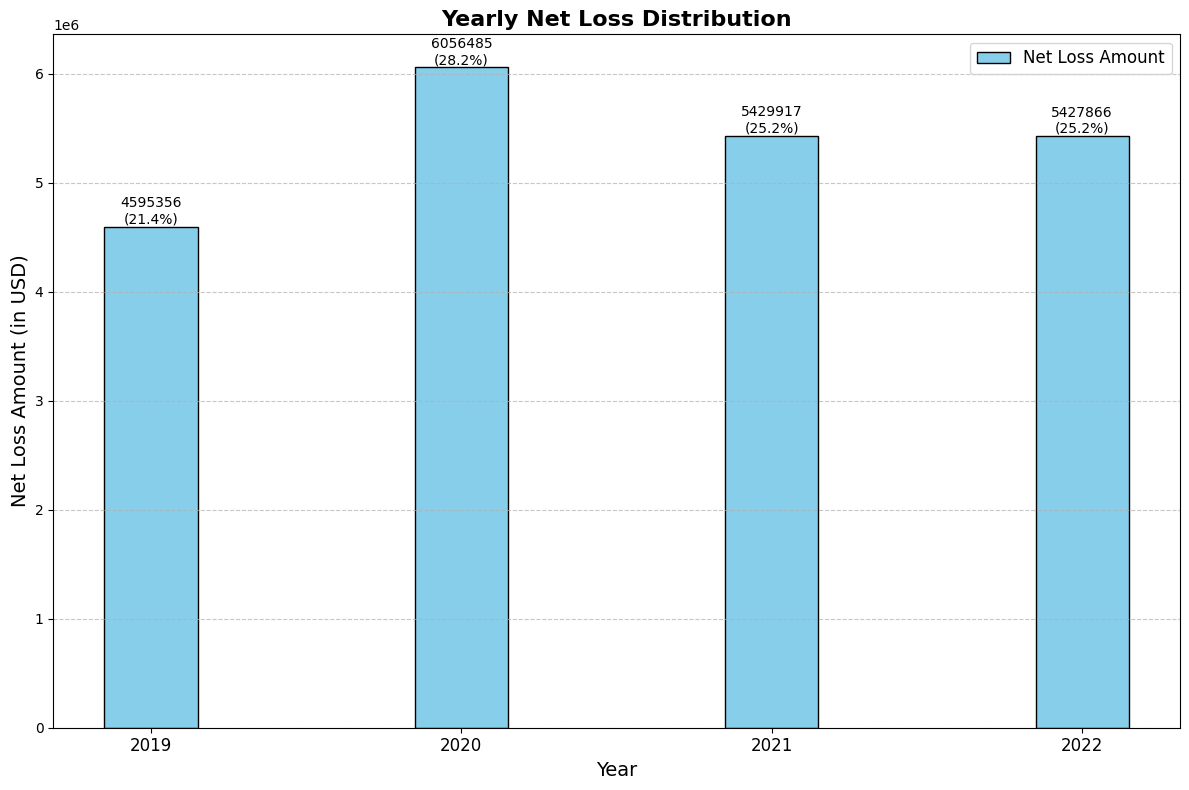

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Net Loss Amount': np.random.randint(-100000, 1000000, size=48)
}
df = pd.DataFrame(data)

# Ensure all Net Loss Amounts are positive
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()

# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss
yearly_net_loss = df.groupby('Year').agg({
    'Net Loss Absolute': 'sum'
}).reset_index()

# Calculate total Net Loss across all years for percentage calculation
total_net_loss = yearly_net_loss['Net Loss Absolute'].sum()
yearly_net_loss['Net Loss Percentage'] = (yearly_net_loss['Net Loss Absolute'] / total_net_loss) * 100

# Plot the bar graph
plt.figure(figsize=(12, 8))

# Bar plot for Yearly Net Loss Absolute with reduced bar width
bars = plt.bar(
    yearly_net_loss['Year'].astype(str),
    yearly_net_loss['Net Loss Absolute'],
    color='skyblue',
    edgecolor='black',
    width=0.3,  # Reduced bar width
    label='Net Loss Amount'
)

# Add labels to the bars for Net Loss Absolute and Percentage
for bar, value, percentage in zip(bars, yearly_net_loss['Net Loss Absolute'], yearly_net_loss['Net Loss Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Set labels, title, and x-axis rotation
plt.title('Yearly Net Loss Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Loss Amount (in USD)', fontsize=14)
plt.xticks(fontsize=12)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\2474126492.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


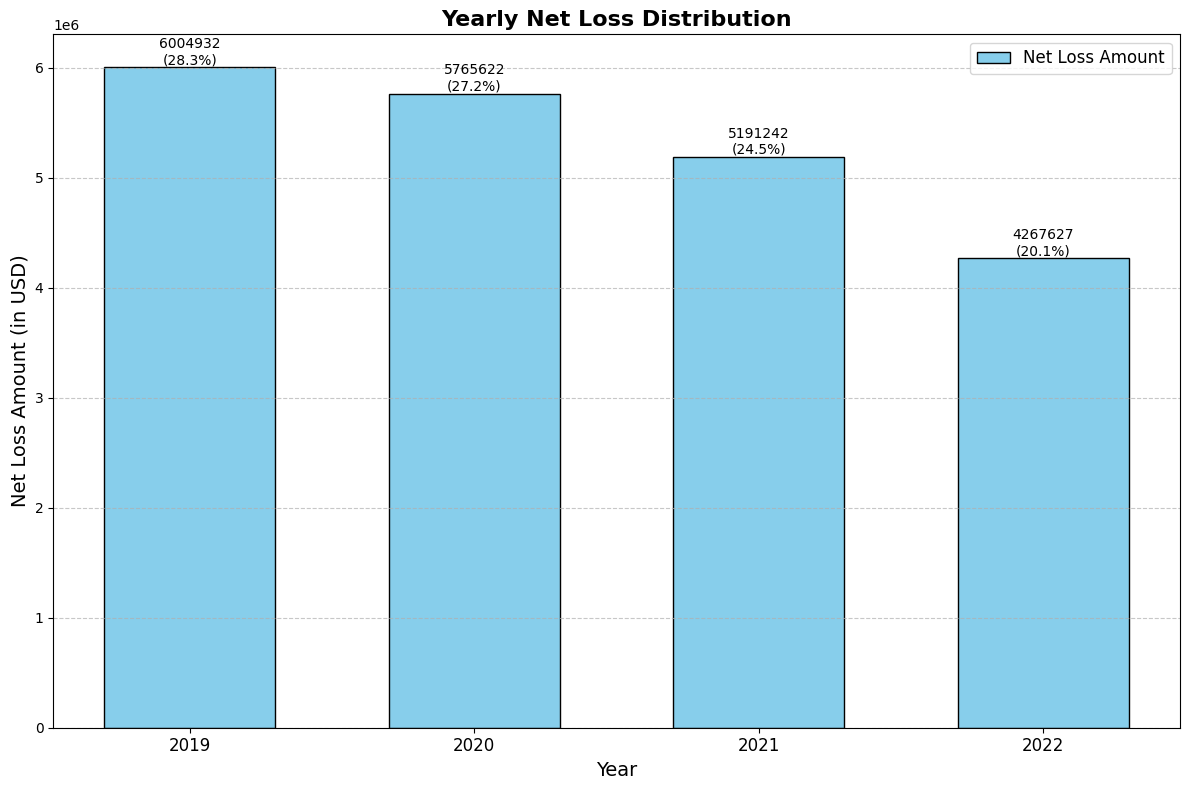

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Net Loss Amount': np.random.randint(-100000, 1000000, size=48)
}
df = pd.DataFrame(data)

# Ensure all Net Loss Amounts are positive
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()

# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group by Year and calculate total Net Loss
yearly_net_loss = df.groupby('Year').agg({
    'Net Loss Absolute': 'sum'
}).reset_index()

# Calculate total Net Loss across all years for percentage calculation
total_net_loss = yearly_net_loss['Net Loss Absolute'].sum()
yearly_net_loss['Net Loss Percentage'] = (yearly_net_loss['Net Loss Absolute'] / total_net_loss) * 100

# Plot the bar graph
plt.figure(figsize=(12, 8))

# Bar plot for Yearly Net Loss Absolute with reduced bar width
bars = plt.bar(
    yearly_net_loss['Year'].astype(str),
    yearly_net_loss['Net Loss Absolute'],
    color='skyblue',
    edgecolor='black',
    width=0.6,  # Reduced bar width
    label='Net Loss Amount'
)

# Add labels to the bars for Net Loss Absolute and Percentage
for bar, value, percentage in zip(bars, yearly_net_loss['Net Loss Absolute'], yearly_net_loss['Net Loss Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Set x-ticks to show only the years available in the data
plt.xticks(
    ticks=yearly_net_loss['Year'].astype(str),  # Use only available years
    labels=yearly_net_loss['Year'].astype(str),
    fontsize=12
)

# Set labels, title, and x-axis rotation
plt.title('Yearly Net Loss Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Loss Amount (in USD)', fontsize=14)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\1919547474.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


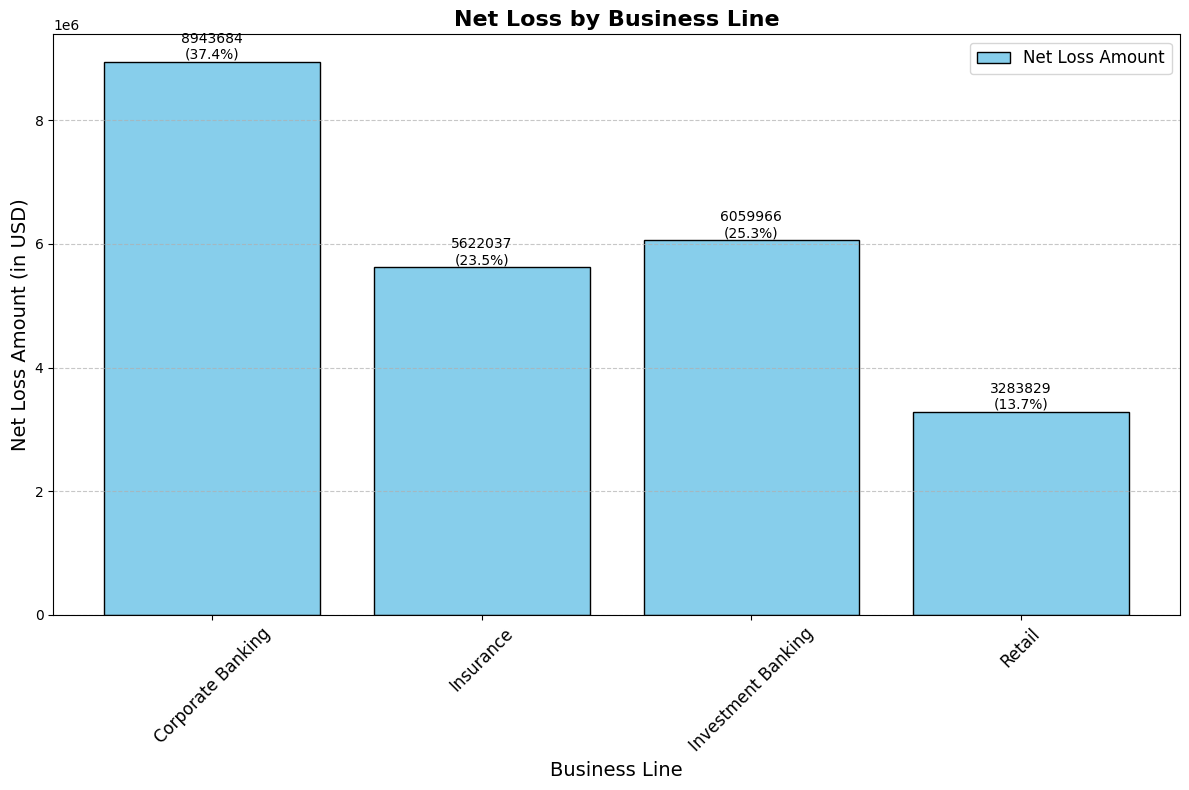

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(
        ['Retail', 'Corporate Banking', 'Investment Banking', 'Insurance'], size=48
    ),
    'Net Loss Amount': np.random.randint(-100000, 1000000, size=48)
}
df = pd.DataFrame(data)

# Ensure all Net Loss Amounts are positive
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()

# Group by Business Line and calculate total Net Loss
business_line_net_loss = df.groupby('Business Line').agg({
    'Net Loss Absolute': 'sum'
}).reset_index()

# Calculate total Net Loss across all Business Lines for percentage calculation
total_net_loss = business_line_net_loss['Net Loss Absolute'].sum()
business_line_net_loss['Net Loss Percentage'] = (business_line_net_loss['Net Loss Absolute'] / total_net_loss) * 100

# Plot the bar graph
plt.figure(figsize=(12, 8))

# Bar plot for Business Line Net Loss Absolute
bars = plt.bar(
    business_line_net_loss['Business Line'],
    business_line_net_loss['Net Loss Absolute'],
    color='skyblue',
    edgecolor='black',
    label='Net Loss Amount'
)

# Add labels to the bars for Net Loss Absolute and Percentage
for bar, value, percentage in zip(bars, business_line_net_loss['Net Loss Absolute'], business_line_net_loss['Net Loss Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Set labels, title, and x-axis rotation
plt.title('Net Loss by Business Line', fontsize=16, fontweight='bold')
plt.xlabel('Business Line', fontsize=14)
plt.ylabel('Net Loss Amount (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\2376641763.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


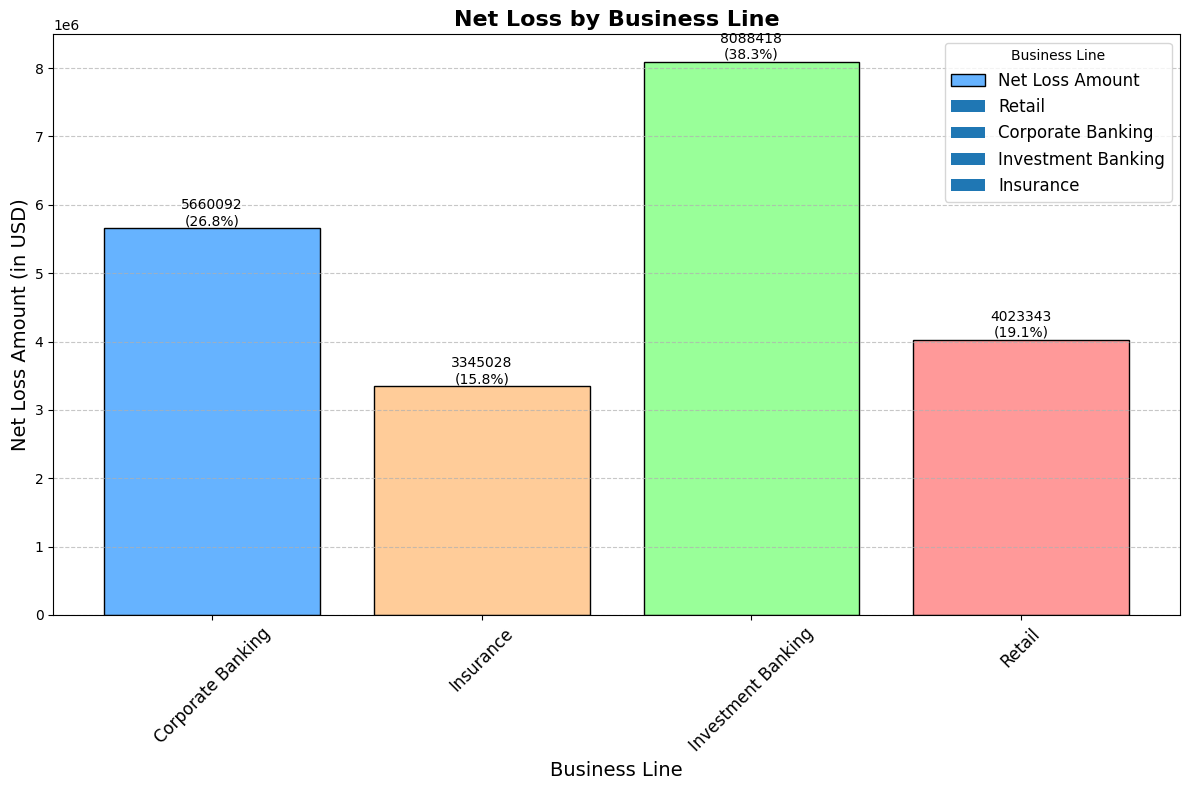

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Business Line': np.random.choice(
        ['Retail', 'Corporate Banking', 'Investment Banking', 'Insurance'], size=48
    ),
    'Net Loss Amount': np.random.randint(-100000, 1000000, size=48)
}
df = pd.DataFrame(data)

# Ensure all Net Loss Amounts are positive
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()

# Group by Business Line and calculate total Net Loss
business_line_net_loss = df.groupby('Business Line').agg({
    'Net Loss Absolute': 'sum'
}).reset_index()

# Calculate total Net Loss across all Business Lines for percentage calculation
total_net_loss = business_line_net_loss['Net Loss Absolute'].sum()
business_line_net_loss['Net Loss Percentage'] = (business_line_net_loss['Net Loss Absolute'] / total_net_loss) * 100

# Define a custom color dictionary for each Business Line
color_dict = {
    'Retail': '#ff9999',          # Light Red
    'Corporate Banking': '#66b3ff',  # Light Blue
    'Investment Banking': '#99ff99', # Light Green
    'Insurance': '#ffcc99',        # Light Orange
}

# Assign colors to each bar based on Business Line
bar_colors = [color_dict[business_line] for business_line in business_line_net_loss['Business Line']]

# Plot the bar graph
plt.figure(figsize=(12, 8))

# Bar plot for Business Line Net Loss Absolute
bars = plt.bar(
    business_line_net_loss['Business Line'],
    business_line_net_loss['Net Loss Absolute'],
    color=bar_colors,  # Use custom colors
    edgecolor='black',
    label='Net Loss Amount'
)

# Add labels to the bars for Net Loss Absolute and Percentage
for bar, value, percentage in zip(bars, business_line_net_loss['Net Loss Absolute'], business_line_net_loss['Net Loss Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Set labels, title, and x-axis rotation
plt.title('Net Loss by Business Line', fontsize=16, fontweight='bold')
plt.xlabel('Business Line', fontsize=14)
plt.ylabel('Net Loss Amount (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Add a legend with custom colors
for business_line, color in color_dict.items():
    plt.bar([], [], color=color, label=business_line)  # Empty bars for legend
plt.legend(title='Business Line',loc='upper right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\1531892733.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),


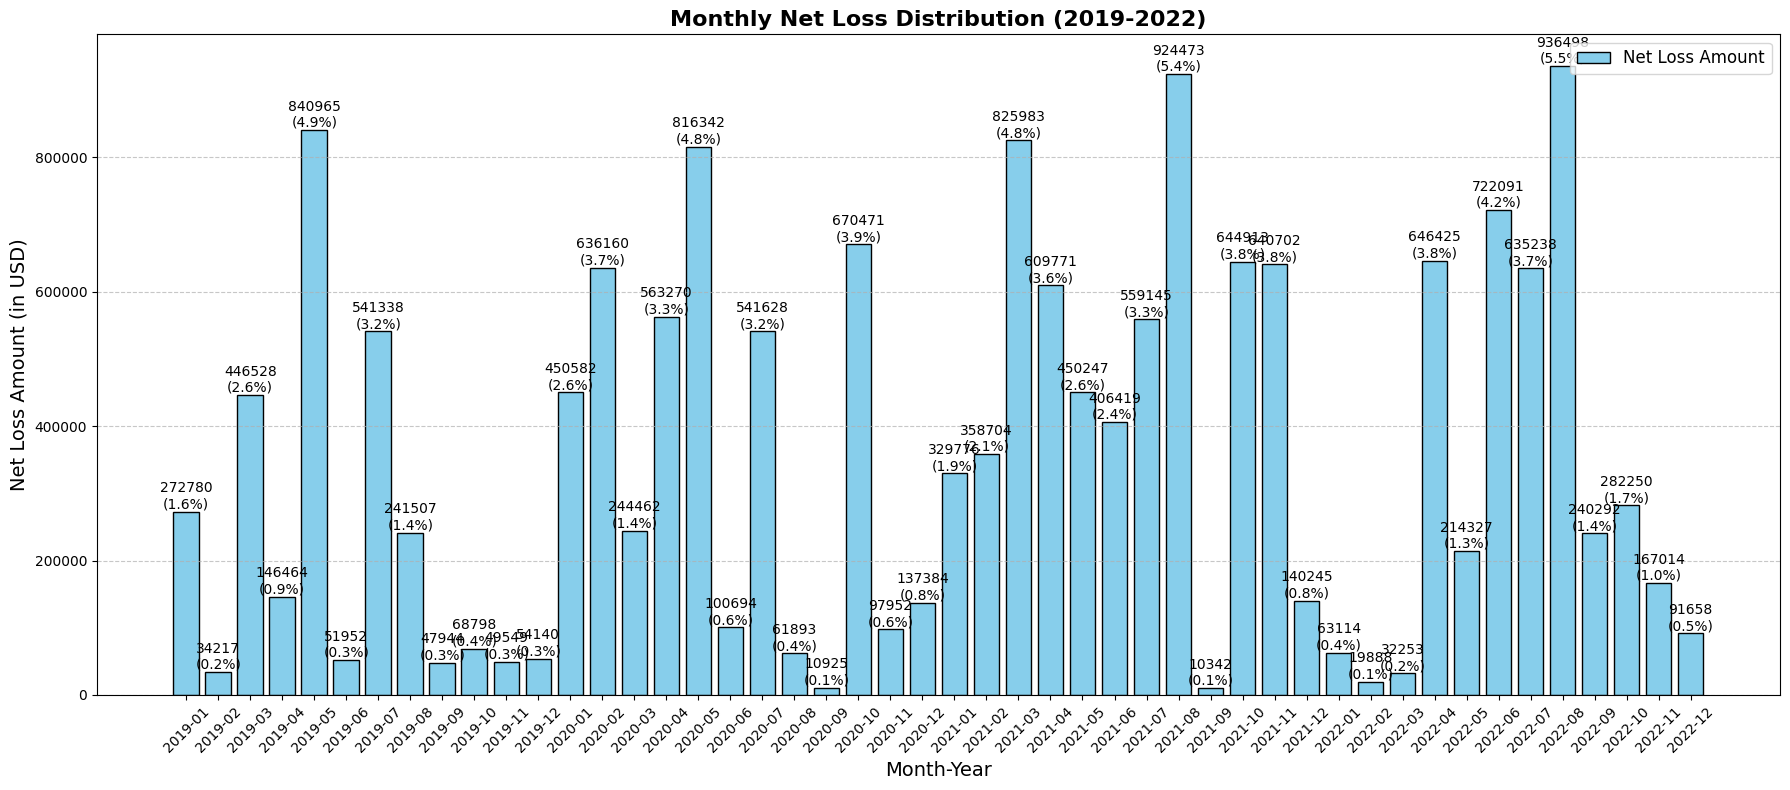

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2019-01-01', end='2022-12-31', freq='M'),
    'Net Loss Amount': np.random.randint(-100000, 1000000, size=48)
}
df = pd.DataFrame(data)

# Ensure all Net Loss Amounts are positive
df['Net Loss Absolute'] = df['Net Loss Amount'].abs()

# Extract Year and Month from Date
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Group by Year and Month and calculate total Net Loss
monthly_net_loss = df.groupby(['Year', 'Month']).agg({
    'Net Loss Absolute': 'sum'
}).reset_index()

# Calculate total Net Loss for percentage calculation
total_net_loss = monthly_net_loss['Net Loss Absolute'].sum()
monthly_net_loss['Net Loss Percentage'] = (monthly_net_loss['Net Loss Absolute'] / total_net_loss) * 100

# Create a Month-Year label for the x-axis
monthly_net_loss['Month-Year'] = (
    monthly_net_loss['Year'].astype(str) + '-' + monthly_net_loss['Month'].astype(str).str.zfill(2)
)

# Plot the bar graph
plt.figure(figsize=(18, 8))

# Bar plot for Net Loss Absolute
bars = plt.bar(
    monthly_net_loss['Month-Year'],
    monthly_net_loss['Net Loss Absolute'],
    color='skyblue',
    edgecolor='black',
    label='Net Loss Amount'
)

# Add labels to the bars for Net Loss Absolute and Percentage
for bar, value, percentage in zip(bars, monthly_net_loss['Net Loss Absolute'], monthly_net_loss['Net Loss Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{value:.0f}\n({percentage:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Set labels, title, and x-axis rotation
plt.title('Monthly Net Loss Distribution (2019-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Net Loss Amount (in USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\4054352757.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(event_summary["Event Type"], rotation=45, ha="right")


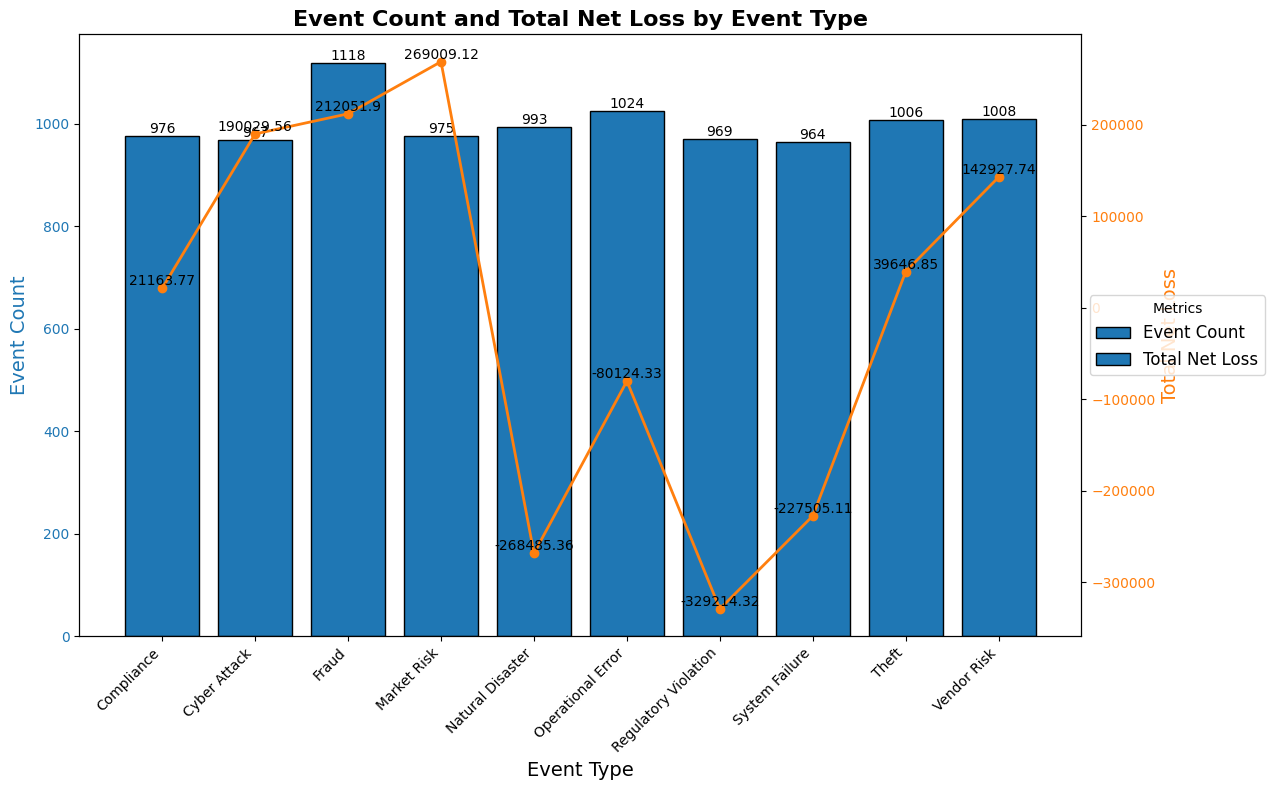

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Event Type and calculate total Net Loss and Event Count
event_summary = df.groupby("Event Type").agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for Event Count
bars = ax1.bar(
    event_summary["Event Type"], event_summary["Event_Count"], 
    color='#1f77b4', edgecolor='black', label="Event Count"  # Set color to a pleasant blue
)

ax1.set_xlabel("Event Type", fontsize=14)
ax1.set_ylabel("Event Count", fontsize=14, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
ax1.set_xticklabels(event_summary["Event Type"], rotation=45, ha="right")

# Annotate Event Count values
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

# Create the second y-axis for Total Net Loss
ax2 = ax1.twinx()

# Line plot for Total Net Loss
line, = ax2.plot(
    event_summary["Event Type"], event_summary["Total_Net_Loss"], 
    color='#ff7f0e', marker="o", linewidth=2, label="Total Net Loss"  # Set color to a vibrant orange
)

ax2.set_ylabel("Total Net Loss", fontsize=14, color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Annotate Total Net Loss values
for i, txt in enumerate(event_summary["Total_Net_Loss"]):
    ax2.text(event_summary["Event Type"][i], txt, round(txt, 2), ha='center', va='bottom', fontsize=10, color='black')

# Title and layout adjustments
plt.title("Event Count and Total Net Loss by Event Type", fontsize=16, fontweight="bold")
plt.tight_layout()

# Adjust the legend to be on the right side
lines_labels = ax1.patches + [line]
labels = ['Event Count', 'Total Net Loss']
plt.legend(lines_labels, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title="Metrics")

plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\2769124143.py:67: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11496\2769124143.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(event_summary["Event Type"], rotation=45, ha="right")


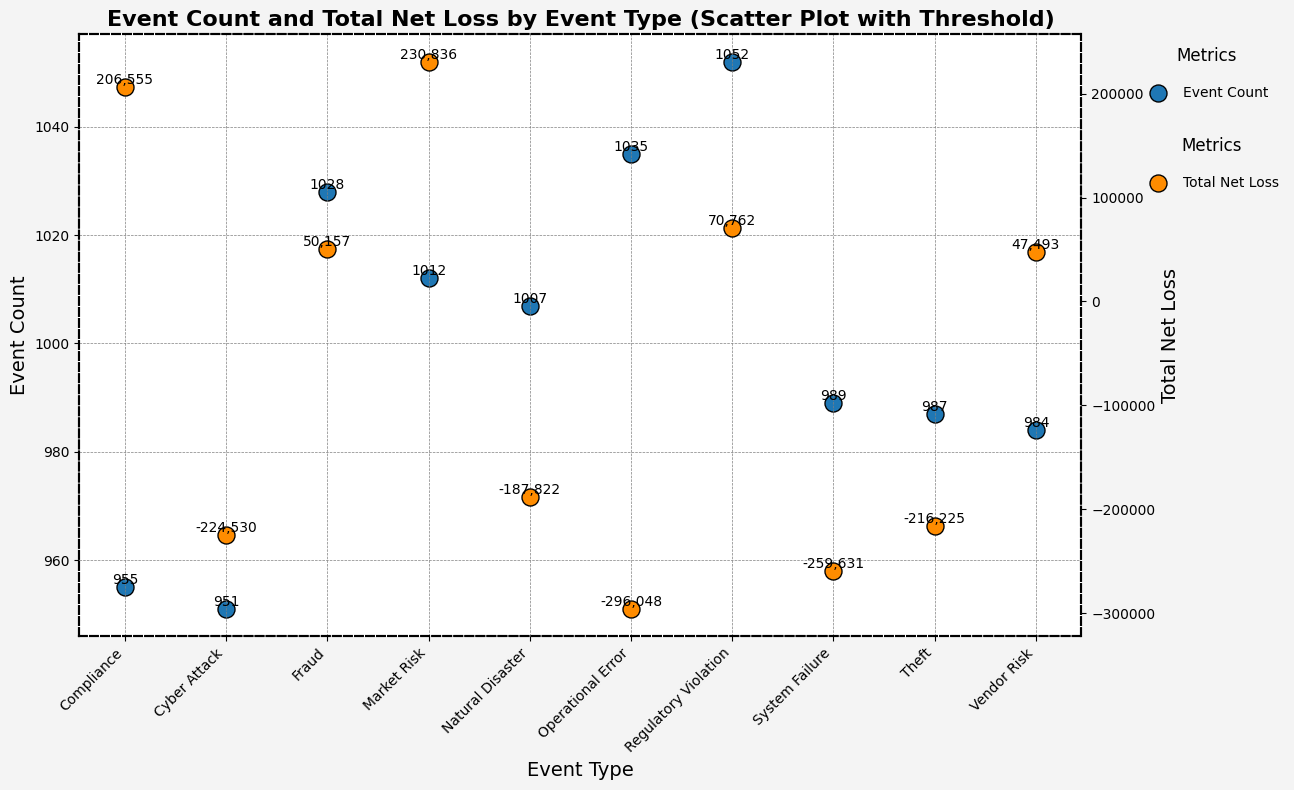

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Group by Event Type and calculate total Net Loss and Event Count
event_summary = df.groupby("Event Type").agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Define the threshold
threshold_event_count = 500  # Example threshold for Event Count
threshold_net_loss = 10000  # Example threshold for Total Net Loss

# Dual-Axis Plot: Event Count and Total Net Loss (Event Type) with Scatter Points
fig, ax1 = plt.subplots(figsize=(12, 8))

# Color palette for scatter plot (Event Count)
sns.scatterplot(
    data=event_summary,
    x="Event Type",
    y="Event_Count",
    ax=ax1,
    palette="Set2",  # More colorful palette (lighter tones)
    s=150,  # Size of scatter points
    edgecolor='black',  # Adding a border to make points stand out
    label='Event Count'
)
ax1.set_xlabel("Event Type", fontsize=14)
ax1.set_ylabel("Event Count", fontsize=14)
ax1.tick_params(axis='y')
ax1.set_xticklabels(event_summary["Event Type"], rotation=45, ha="right")

# Add values on each point for Event Count (only if it exceeds threshold)
for i, row in event_summary.iterrows():
    if row["Event_Count"] > threshold_event_count:
        ax1.text(
            x=row["Event Type"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

# Create the second y-axis for Total Net Loss
ax2 = ax1.twinx()
sns.scatterplot(
    data=event_summary,
    x="Event Type",
    y="Total_Net_Loss",
    ax=ax2,
    color='darkorange',  # Dark orange color for better contrast
    s=150,  # Size of scatter points
    edgecolor='black',  # Border to make the points visible
    label='Total Net Loss'
)
ax2.set_ylabel("Total Net Loss", fontsize=14)
ax2.tick_params(axis='y')

# Add values on each point for Total Net Loss (only if it exceeds threshold)
for i, row in event_summary.iterrows():
    if abs(row["Total_Net_Loss"]) > threshold_net_loss:
        ax2.text(
            x=row["Event Type"], 
            y=row["Total_Net_Loss"], 
            s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

# Title and layout adjustments
plt.title("Event Count and Total Net Loss by Event Type (Scatter Plot with Threshold)", fontsize=16, fontweight="bold")
plt.tight_layout()

# Set background color for a clean look
plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

# Add legends for both axes on the right side of the plot
ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

# Dotted grid lines
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Dotted box around the plot
for spine in ax1.spines.values():
    spine.set_linestyle('--')  # Dotted line style
    spine.set_linewidth(1.5)  # Line thickness

for spine in ax2.spines.values():
    spine.set_linestyle('--')  # Dotted line style
    spine.set_linewidth(1.5)  # Line thickness

plt.show()
